In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from    statsmodels.tsa.seasonal import   seasonal_decompose

# Problem

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century. Data set for the Problem: Sparkling.csv and Rose.csv

## Rose

###   Read the data as an appropriate Time Series data and plot the data.

In [2]:
df=pd.read_csv("Rose.csv")

In [3]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [5]:
df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [7]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [8]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [9]:
df.tail()

,YearMonth,Rose,Time_Stamp
182,1995-03,45.0,1995-03-31
183,1995-04,52.0,1995-04-30
184,1995-05,28.0,1995-05-31
185,1995-06,40.0,1995-06-30
186,1995-07,62.0,1995-07-31


In [10]:
df.set_index("Time_Stamp",inplace=True)


In [11]:
df.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [12]:
df.drop("YearMonth",axis=1,inplace=True)

In [13]:
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [14]:
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

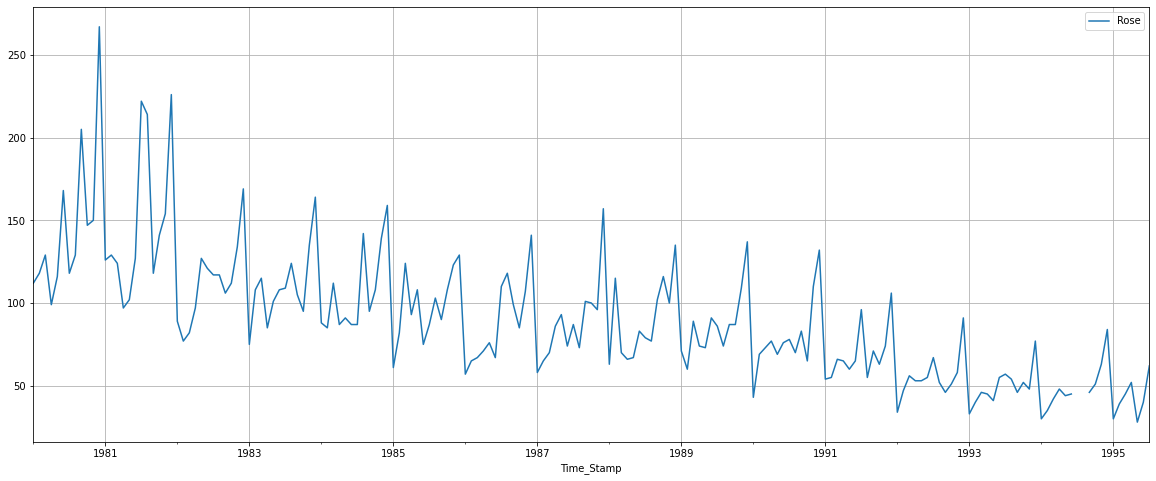

In [16]:
df.plot()
plt.grid();

### Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [17]:
df.bfill(axis ='rows',inplace=True)

In [18]:
df.isnull().sum()

Rose    0
dtype: int64

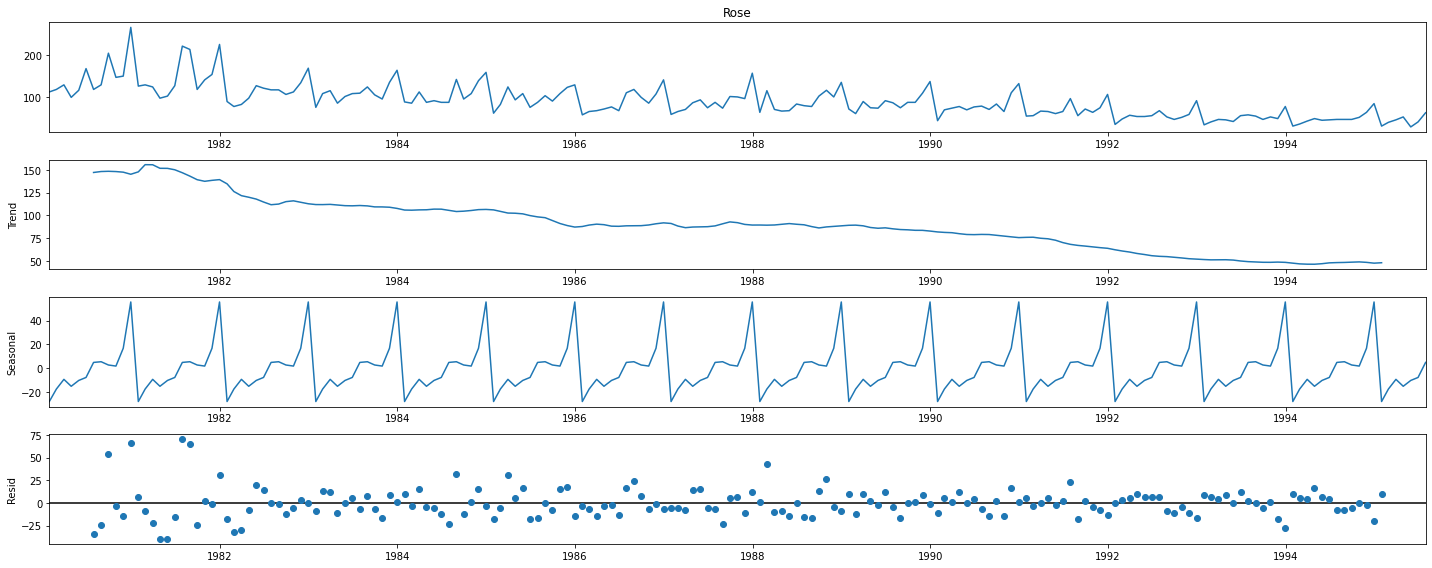

In [19]:
decomposition = seasonal_decompose(df['Rose'], model='additive')
decomposition.plot();

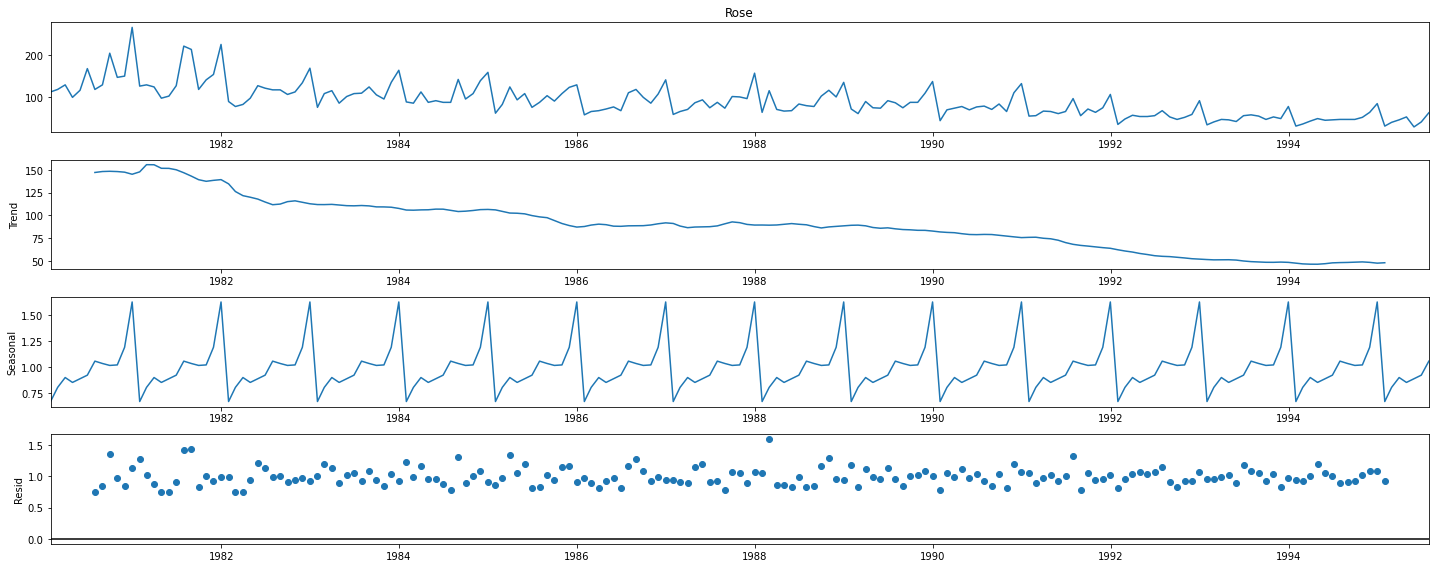

In [20]:
decomposition = seasonal_decompose(df['Rose'], model='multiplicative')
decomposition.plot();

In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid


In [22]:
residual.mean()

0.9994553586957378

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9488479495048523, pvalue=5.949785190750845e-06)


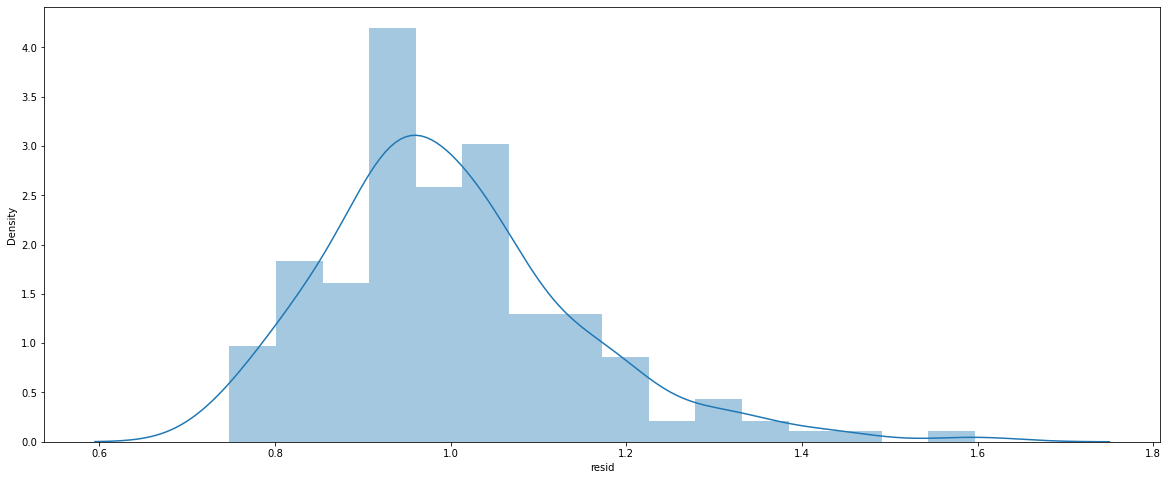

In [23]:
sns.distplot(residual)
from scipy.stats import shapiro
print(shapiro(residual.dropna()))


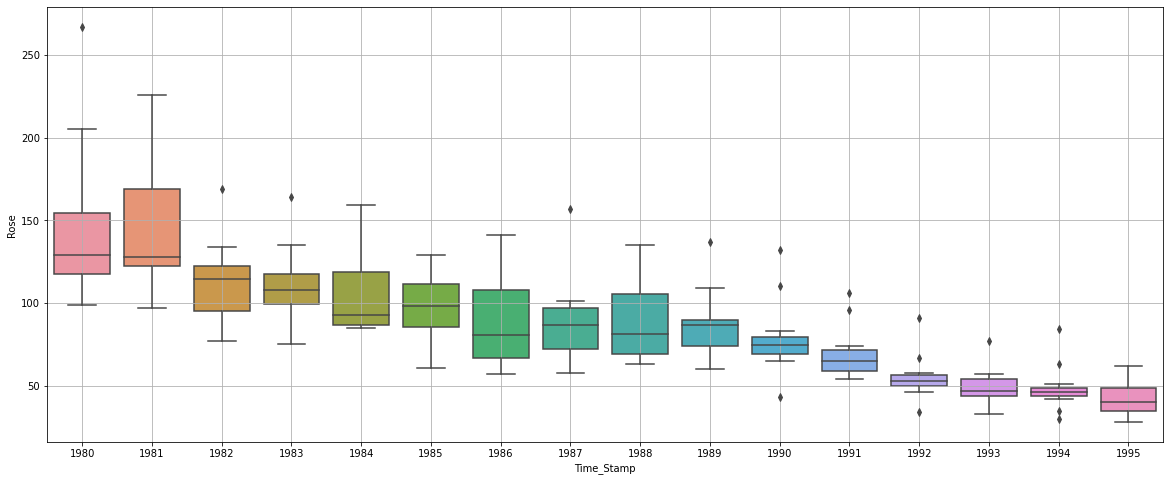

In [24]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

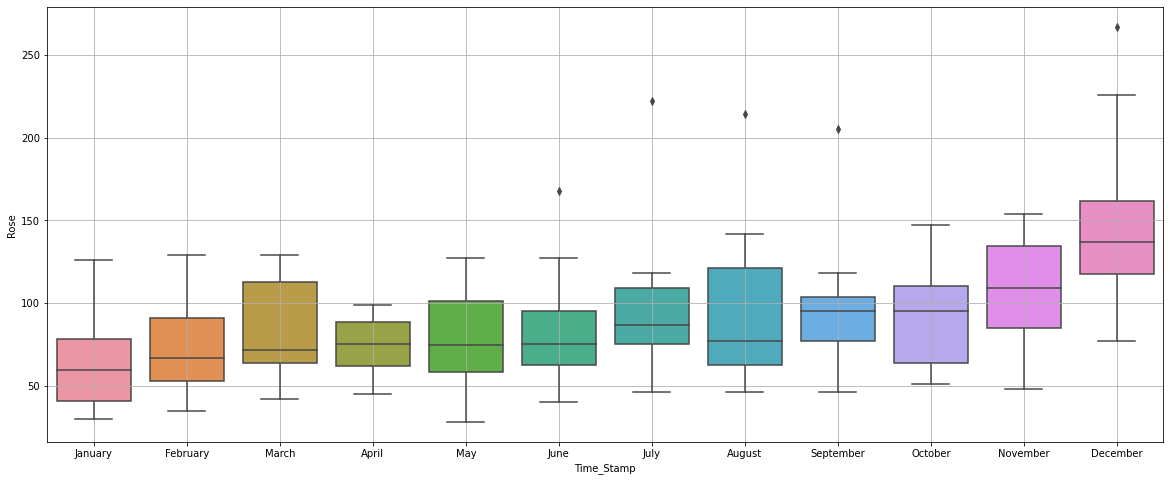

In [25]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

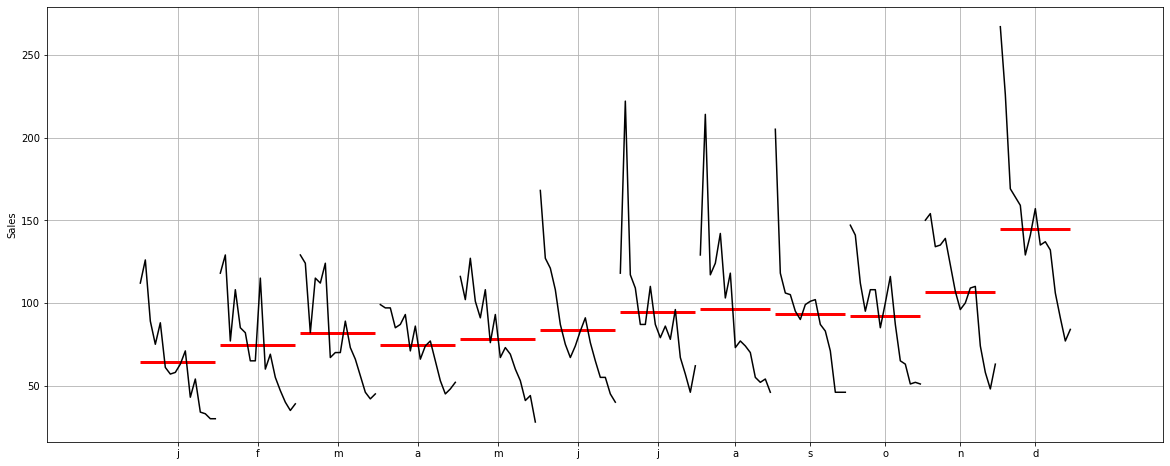

In [26]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

In [27]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


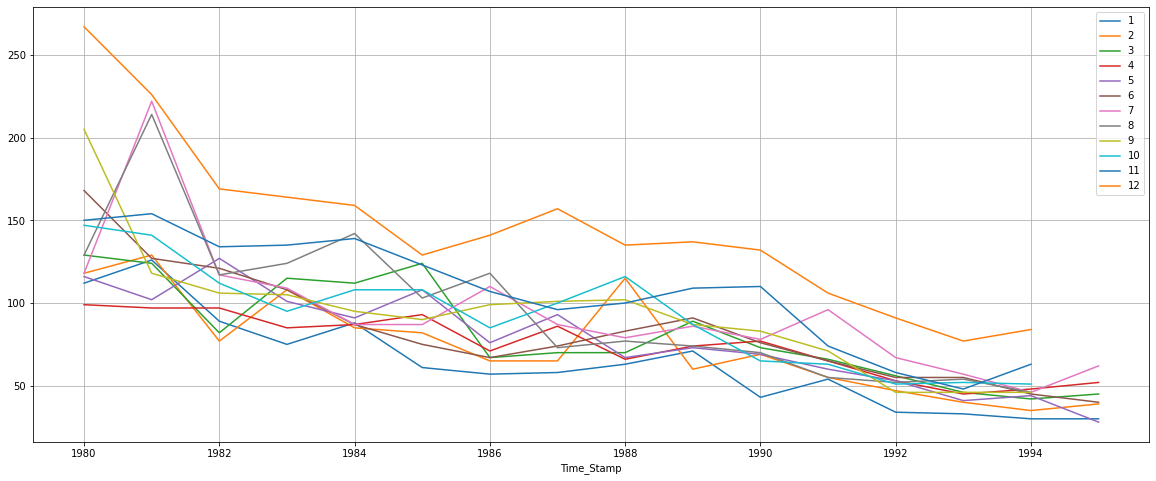

In [28]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

### Split the data into training and test. The test data should start in 1991

In [29]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [30]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [31]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [32]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


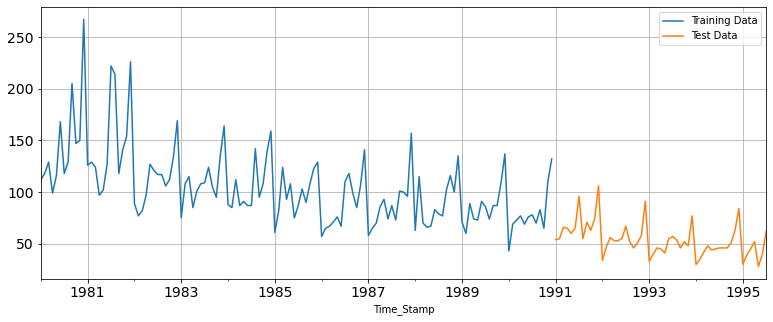

In [33]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

###  Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

Linear Regression

In [34]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [35]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [36]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)


LinearRegression()

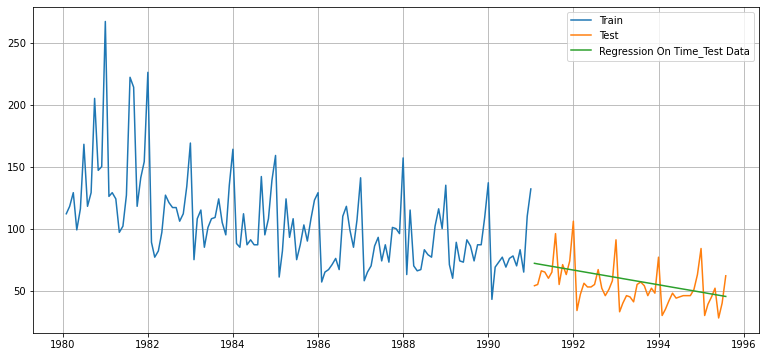

In [39]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [40]:
from sklearn import metrics

In [41]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.263


In [42]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.262509


naïve forecast models

In [43]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [44]:
NaiveModel_train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [45]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

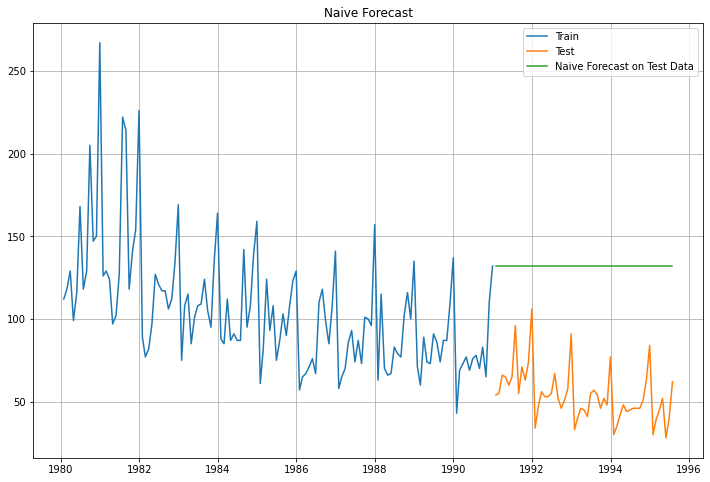

In [46]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [47]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 79.699


In [48]:
mape_model2_test = metrics.mean_absolute_percentage_error(test['Rose'],NaiveModel_test['naive'])
print("For Naive forecast on the Test Data,  MAPE is %3.3f" %(mape_model2_test))

For Naive forecast on the Test Data,  MAPE is 1.647


In [49]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093


simple average models

In [50]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [51]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


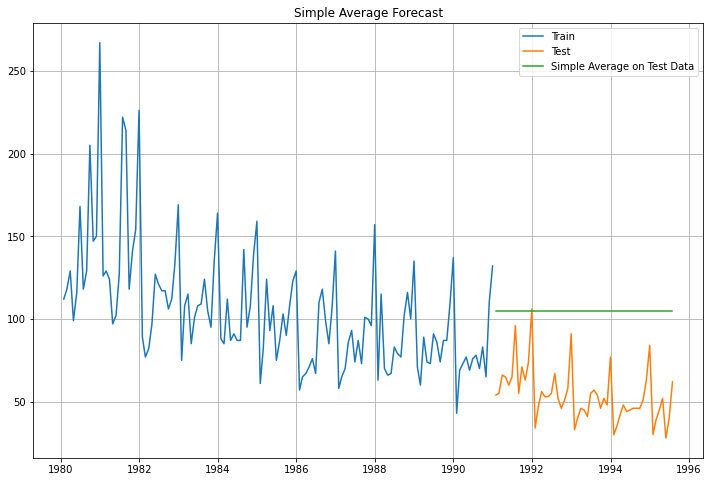

In [52]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [53]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.440


In [54]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426


Moving Average

In [55]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [56]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Rose'].rolling(12).mean()

MovingAverage.head(15)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9,Trailing_12
Time_Stamp,,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN,NaN
1980-06-30,168.0,142.0,128.00,123.666667,NaN,NaN
1980-07-31,118.0,143.0,125.25,124.666667,NaN,NaN
1980-08-31,129.0,123.5,132.75,126.500000,NaN,NaN
1980-09-30,205.0,167.0,155.00,139.166667,132.666667,NaN


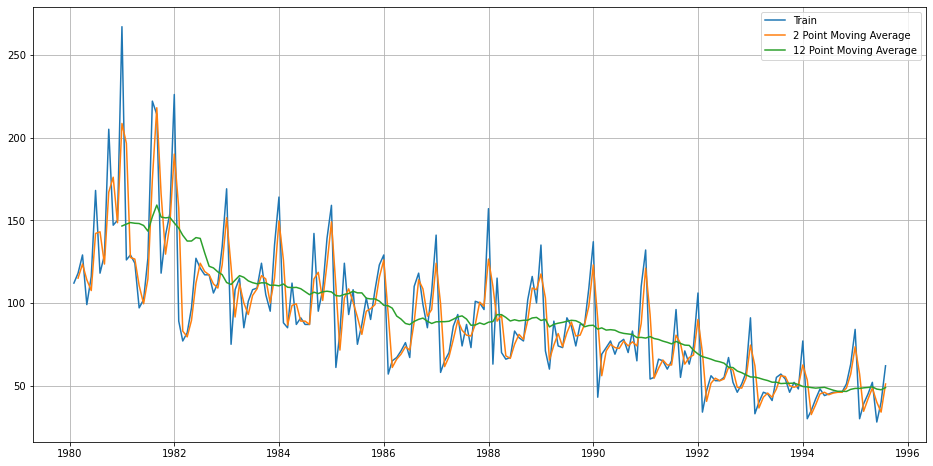

In [57]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
#plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
#plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
#plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [58]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

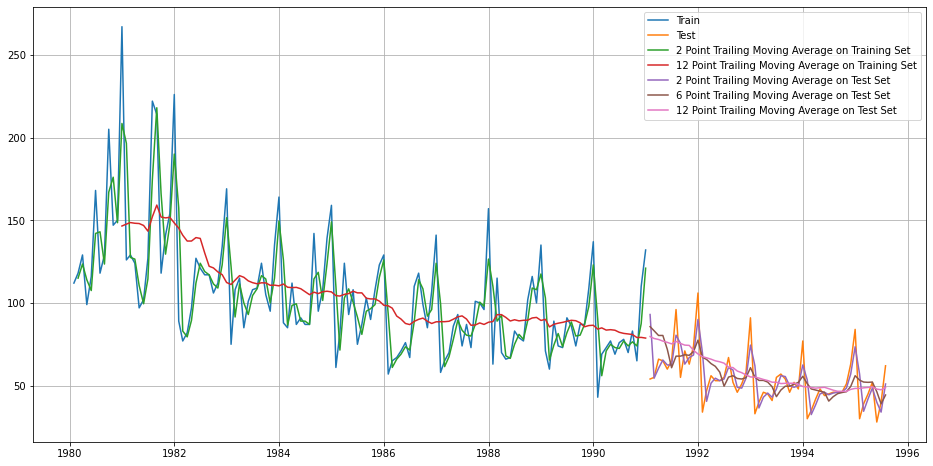

In [59]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_12'],label = '12 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
#plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
#plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [60]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

## Test Data - RMSE  --> 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_12))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.449
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.560
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.725 
For 12 point Moving Average Model forecast on the Training Data,  RMSE is 15.234 


In [61]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9,rmse_model4_test_12]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402


In [62]:
import statsmodels
statsmodels.__version__

'0.12.2'

Simple exponential smoothing

In [63]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [64]:
SES_train = train.copy()
SES_test = test.copy()

In [65]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [66]:
model_SES_autofit = model_SES.fit(optimized=True)

In [67]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


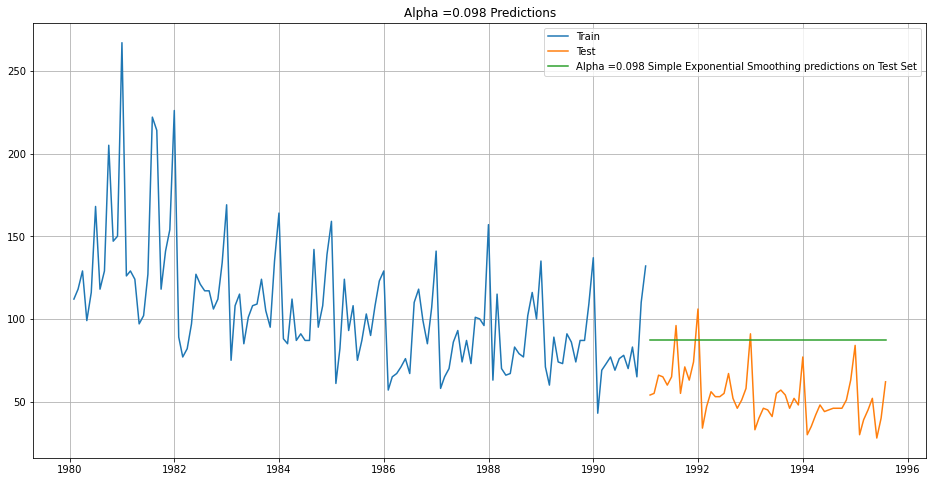

In [69]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

In [70]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.776


In [71]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402
"Alpha=0.098,SimpleExponentialSmoothing",36.775774


In [72]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [73]:
for i in np.arange(0.1,1.1,0.1):
    
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [74]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,31.815610,36.807579
1,0.2,31.979391,41.341486
2,0.3,32.470164,47.484552
3,0.4,33.035130,53.747269
4,0.5,33.682839,59.621767
5,0.6,34.441171,64.951370
6,0.7,35.323261,69.678327
7,0.8,36.334596,73.754223
8,0.9,37.482782,77.119559
9,1.0,38.783783,79.699093


In [75]:
SES_test.head()

,Rose,predict,"(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)","(predict, 1.0)"
Time_Stamp,,,,,,,,,,,,
1991-01-31,54.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0
1991-02-28,55.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0
1991-03-31,66.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0
1991-04-30,65.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0
1991-05-31,60.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0


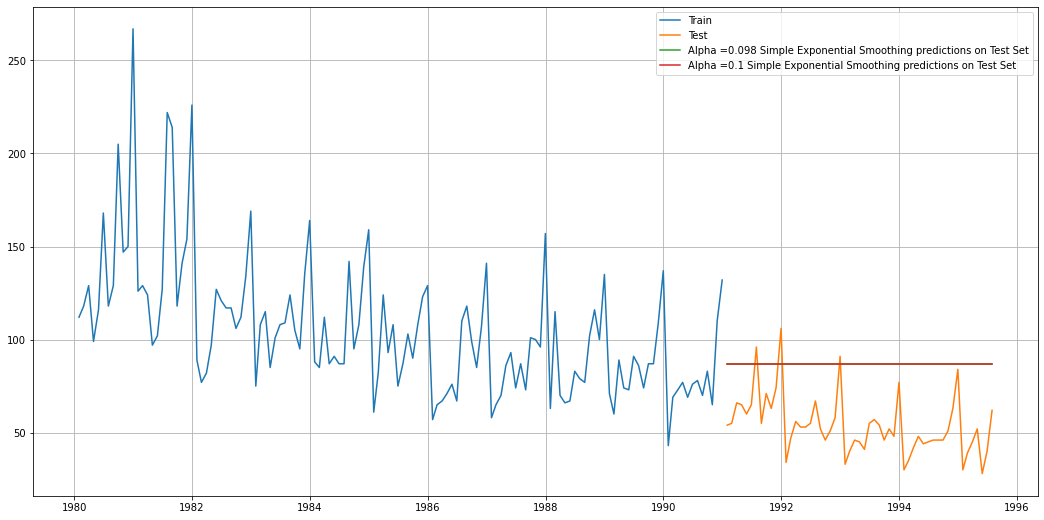

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [77]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402
"Alpha=0.098,SimpleExponentialSmoothing",36.775774
"Alpha=0.1,SimpleExponentialSmoothing",36.807579


Double ExponentialSmoothing

In [78]:
DES_train = train.copy()
DES_test = test.copy()

In [79]:
model_DES = Holt(DES_train['Rose'])

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [80]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [82]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [83]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.902316
1,0.1,0.2,33.450729,48.665843
2,0.1,0.3,33.145789,78.132865
3,0.1,0.4,33.262191,99.559434
4,0.1,0.5,33.688415,124.245515
...,...,...,...,...
95,1.0,0.6,51.831610,801.655979
96,1.0,0.7,54.497039,841.868322
97,1.0,0.8,57.365879,853.941282
98,1.0,0.9,60.474309,834.686686


In [84]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.902316
1,0.1,0.2,33.450729,48.665843
10,0.2,0.1,33.097427,65.708863
2,0.1,0.3,33.145789,78.132865
20,0.3,0.1,33.611269,98.630082


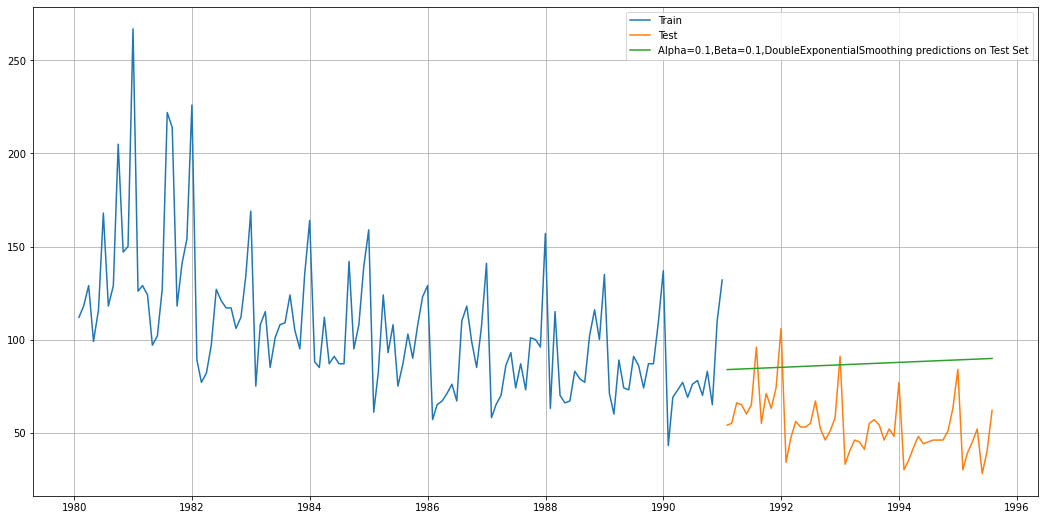

In [85]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [86]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402
"Alpha=0.098,SimpleExponentialSmoothing",36.775774
"Alpha=0.1,SimpleExponentialSmoothing",36.807579


Triple ExponentialSmoothing

In [87]:
TES_train = train.copy()
TES_test = test.copy()

In [88]:
model_TES = ExponentialSmoothing(TES_train['Rose'], trend='additive', seasonal='multiplicative', freq='M')

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [89]:
model_TES_autofit = model_TES.fit()

In [90]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.689174
1991-02-28,55.0,64.129166
1991-03-31,66.0,69.856436
1991-04-30,65.0,60.877474
1991-05-31,60.0,68.237072


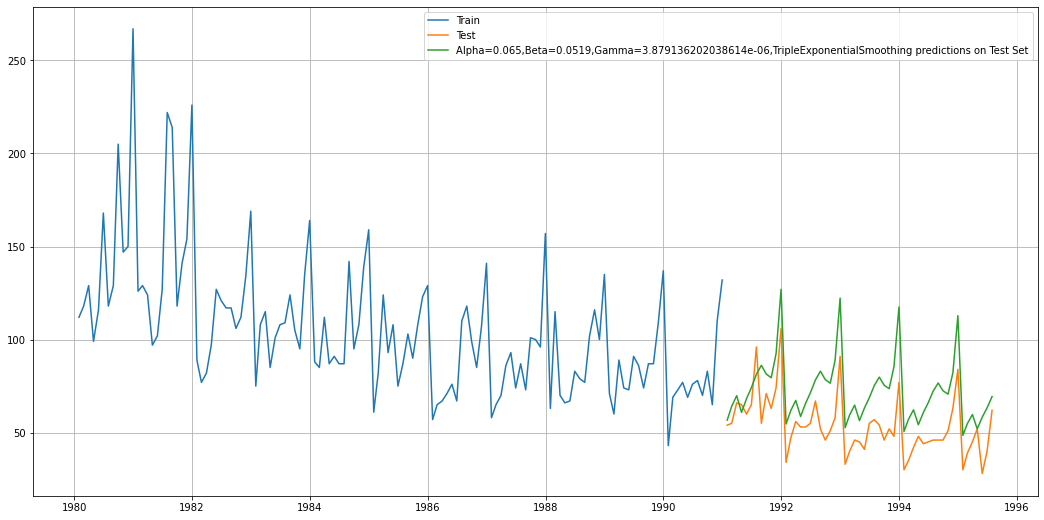

In [92]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.065,Beta=0.0519,Gamma=3.879136202038614e-06,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [93]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("Alpha=0.065,Beta=0.0519,Gamma=3.879136202038614e-06, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Alpha=0.065,Beta=0.0519,Gamma=3.879136202038614e-06, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.995


In [94]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.065,Beta=0.0519,Gamma=3.879136202038614e-06,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402
"Alpha=0.098,SimpleExponentialSmoothing",36.775774
"Alpha=0.1,SimpleExponentialSmoothing",36.807579


In [95]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [96]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [97]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,25.216699,12.780133
1,0.1,0.1,0.2,24.057626,11.901379
2,0.1,0.1,0.3,23.645037,11.837737
3,0.1,0.1,0.4,23.570939,12.119457
4,0.1,0.1,0.5,23.718878,12.627912
...,...,...,...,...,...
995,1.0,1.0,0.6,28358.458519,9603.633854
996,1.0,1.0,0.7,30724.126331,23029.955323
997,1.0,1.0,0.8,1218.755446,9626.717216
998,1.0,1.0,0.9,14150.253251,9691.905886


In [98]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
11,0.1,0.2,0.2,24.365597,9.633969
12,0.1,0.2,0.3,23.969166,9.928246
10,0.1,0.2,0.1,25.529854,9.941996
142,0.2,0.5,0.3,27.631767,10.035302
151,0.2,0.6,0.2,28.289836,10.041876


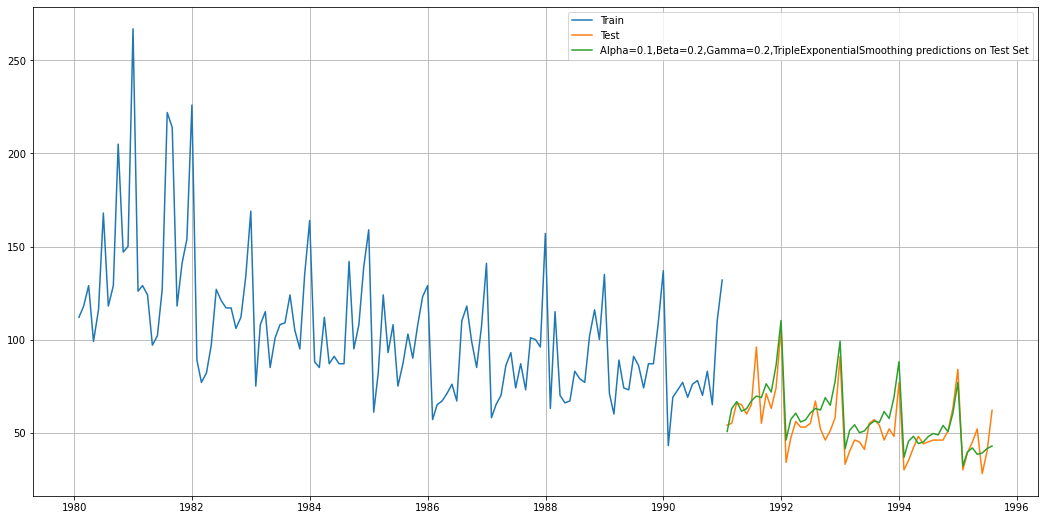

In [99]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [100]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402
"Alpha=0.098,SimpleExponentialSmoothing",36.775774
"Alpha=0.1,SimpleExponentialSmoothing",36.807579


In [101]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.633969
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402
RegressionOnTime,15.262509
"Alpha=0.065,Beta=0.0519,Gamma=3.879136202038614e-06,TripleExponentialSmoothing",20.995338
"Alpha=0.098,SimpleExponentialSmoothing",36.775774
"Alpha=0.1,SimpleExponentialSmoothing",36.807579


###  Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

Note: Stationarity should be checked at alpha = 0.05.

In [138]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

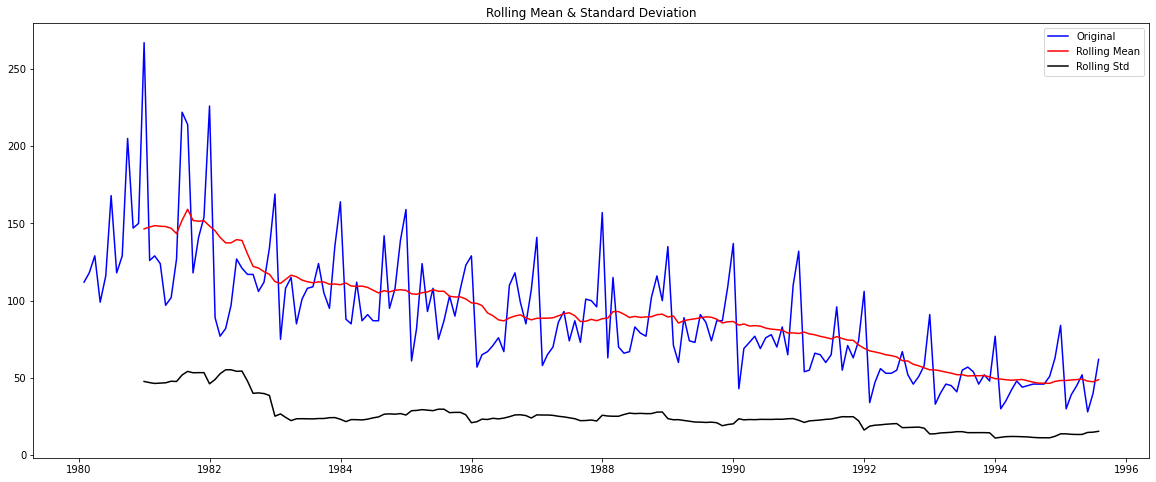

Results of Dickey-Fuller Test:
Test Statistic                  -1.877440
p-value                          0.342747
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [139]:
test_stationarity(df['Rose'])

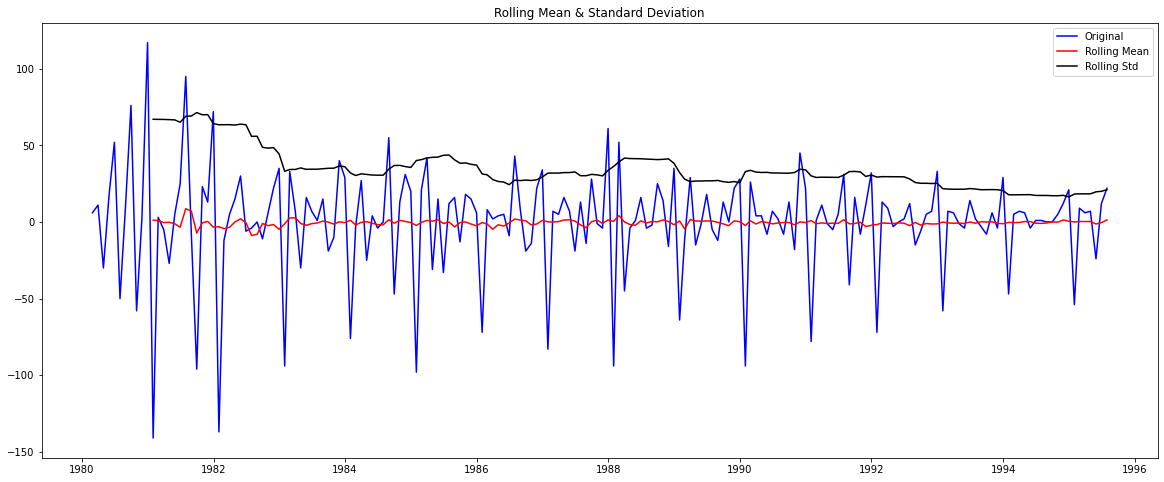

Results of Dickey-Fuller Test:
Test Statistic                -8.044614e+00
p-value                        1.808550e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [140]:
test_stationarity(df['Rose'].diff().dropna())

In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [142]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [143]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [144]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train.values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1324.899702958276
ARIMA(0, 0, 1) - AIC:1305.4684058451614
ARIMA(0, 0, 2) - AIC:1306.58701537989
ARIMA(0, 0, 3) - AIC:1302.3447243866822
ARIMA(1, 0, 0) - AIC:1301.5463044401158
ARIMA(1, 0, 1) - AIC:1294.5105853010818
ARIMA(1, 0, 2) - AIC:1292.053213106044
ARIMA(1, 0, 3) - AIC:1292.9290105336065
ARIMA(2, 0, 0) - AIC:1302.347684974956
ARIMA(2, 0, 1) - AIC:1292.9371947762988


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 2) - AIC:1292.2480559967785


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:1294.2482319973349
ARIMA(3, 0, 0) - AIC:1296.7769530596302
ARIMA(3, 0, 1) - AIC:1293.8830004751471
ARIMA(3, 0, 2) - AIC:1294.247914727887
ARIMA(3, 0, 3) - AIC:1290.9132886556372


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [145]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
15,"(3, 0, 3)",1290.913289
6,"(1, 0, 2)",1292.053213
10,"(2, 0, 2)",1292.248056
7,"(1, 0, 3)",1292.929011
9,"(2, 0, 1)",1292.937195
13,"(3, 0, 1)",1293.883000
14,"(3, 0, 2)",1294.247915
11,"(2, 0, 3)",1294.248232
5,"(1, 0, 1)",1294.510585
12,"(3, 0, 0)",1296.776953


In [146]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Wed, 16 Feb 2022   AIC                           1274.695
Time:                        11:35:56   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0450      0.685      1.527      0.1

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [147]:
test["Predict"] = results_auto_ARIMA.forecast(steps=len(test))

<ipython-input-147-cdbf951ca7e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predict"] = results_auto_ARIMA.forecast(steps=len(test))


In [148]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],test["Predict"],squared=False)
print(rmse)

36.79705233275287


In [365]:
resultsDf1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,3)'])

resultsDf1

,Test RMSE
"ARIMA(2,1,3)",36.797052


In [370]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (0, 1, 4)(0, 1, 4, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (1, 1, 4)(1, 1, 4, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (2, 1, 4)(2, 1, 4, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)
Model: (3, 1, 4)(3, 1, 4, 6)
Model: (4, 1, 0)(4, 1, 0, 6)
Model: (4, 1, 1)(4, 1, 1, 6)
Model: (4, 1, 2)(4, 1, 2, 6)
Model: (4, 1, 3)(4, 1, 3, 6)
Model: (4, 1, 4)(4, 1, 4, 6)


In [371]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [372]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            initialization = 'approximate_diffuse')
            
        results_SARIMA = SARIMA_model.fit(maxiter=10000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:1482.9491276661033
SARIMA(0, 1, 0)x(0, 1, 1, 6) - AIC:1374.6003922823943
SARIMA(0, 1, 0)x(0, 1, 2, 6) - AIC:1388.8677081915453


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0)x(0, 1, 3, 6) - AIC:1389.744600154102
SARIMA(0, 1, 0)x(0, 1, 4, 6) - AIC:1412.0420575230344
SARIMA(0, 1, 0)x(1, 1, 0, 6) - AIC:1371.744259642594
SARIMA(0, 1, 0)x(1, 1, 1, 6) - AIC:1367.4569919028586
SARIMA(0, 1, 0)x(1, 1, 2, 6) - AIC:1350.4308724452058
SARIMA(0, 1, 0)x(1, 1, 3, 6) - AIC:1375.3997272561087
SARIMA(0, 1, 0)x(1, 1, 4, 6) - AIC:1383.2665871206198
SARIMA(0, 1, 0)x(2, 1, 0, 6) - AIC:1379.474184373726
SARIMA(0, 1, 0)x(2, 1, 1, 6) - AIC:1353.3981948689614
SARIMA(0, 1, 0)x(2, 1, 2, 6) - AIC:1346.761414456083
SARIMA(0, 1, 0)x(2, 1, 3, 6) - AIC:1372.1018042559358
SARIMA(0, 1, 0)x(2, 1, 4, 6) - AIC:1385.1394350632568
SARIMA(0, 1, 0)x(3, 1, 0, 6) - AIC:1348.55817478018
SARIMA(0, 1, 0)x(3, 1, 1, 6) - AIC:1347.3271132608356
SARIMA(0, 1, 0)x(3, 1, 2, 6) - AIC:1349.115385846348
SARIMA(0, 1, 0)x(3, 1, 3, 6) - AIC:1351.3733764147314
SARIMA(0, 1, 0)x(3, 1, 4, 6) - AIC:1368.7779404600392
SARIMA(0, 1, 0)x(4, 1, 0, 6) - AIC:1369.0482749590715
SARIMA(0, 1, 0)x(4, 1, 1, 6) - AIC:

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(0, 1, 3)x(0, 1, 1, 6) - AIC:1351.0053327294836
SARIMA(0, 1, 3)x(0, 1, 2, 6) - AIC:1354.7822420919729
SARIMA(0, 1, 3)x(0, 1, 3, 6) - AIC:1373.860433383486
SARIMA(0, 1, 3)x(0, 1, 4, 6) - AIC:1378.0756232569354
SARIMA(0, 1, 3)x(1, 1, 0, 6) - AIC:1314.0117185276958
SARIMA(0, 1, 3)x(1, 1, 1, 6) - AIC:1320.4178802665194
SARIMA(0, 1, 3)x(1, 1, 2, 6) - AIC:1314.7984986195402
SARIMA(0, 1, 3)x(1, 1, 3, 6) - AIC:1331.3490682234926
SARIMA(0, 1, 3)x(1, 1, 4, 6) - AIC:1367.15639658478
SARIMA(0, 1, 3)x(2, 1, 0, 6) - AIC:1324.3591954210342
SARIMA(0, 1, 3)x(2, 1, 1, 6) - AIC:1319.2076838138787
SARIMA(0, 1, 3)x(2, 1, 2, 6) - AIC:1324.7002999959768
SARIMA(0, 1, 3)x(2, 1, 3, 6) - AIC:1375.3794267056583
SARIMA(0, 1, 3)x(2, 1, 4, 6) - AIC:1353.1796310418185
SARIMA(0, 1, 3)x(3, 1, 0, 6) - AIC:1315.8336803129814
SARIMA(0, 1, 3)x(3, 1, 1, 6) - AIC:1317.6182626049376
SARIMA(0, 1, 3)x(3, 1, 2, 6) - AIC:1318.040652788773
SARIMA(0, 1, 3)x(3, 1, 3, 6) - AIC:1329.8106026366331
SARIMA(0, 1, 3)x(3, 1, 4, 6) - A

SARIMA(1, 1, 4)x(0, 1, 4, 6) - AIC:1385.6064444078875
SARIMA(1, 1, 4)x(1, 1, 0, 6) - AIC:1318.5816954549482
SARIMA(1, 1, 4)x(1, 1, 1, 6) - AIC:1321.0832156332294
SARIMA(1, 1, 4)x(1, 1, 2, 6) - AIC:1326.0374671782927
SARIMA(1, 1, 4)x(1, 1, 3, 6) - AIC:1337.3556543201262
SARIMA(1, 1, 4)x(1, 1, 4, 6) - AIC:1374.8858998936805
SARIMA(1, 1, 4)x(2, 1, 0, 6) - AIC:1329.3665514271052
SARIMA(1, 1, 4)x(2, 1, 1, 6) - AIC:1322.3119240259234
SARIMA(1, 1, 4)x(2, 1, 2, 6) - AIC:1327.8866415447824
SARIMA(1, 1, 4)x(2, 1, 3, 6) - AIC:1343.7340245112541
SARIMA(1, 1, 4)x(2, 1, 4, 6) - AIC:1363.896572276201
SARIMA(1, 1, 4)x(3, 1, 0, 6) - AIC:1311.3888756406004
SARIMA(1, 1, 4)x(3, 1, 1, 6) - AIC:1340.6431155904424
SARIMA(1, 1, 4)x(3, 1, 2, 6) - AIC:1314.2355635440247
SARIMA(1, 1, 4)x(3, 1, 3, 6) - AIC:1328.617828643709
SARIMA(1, 1, 4)x(3, 1, 4, 6) - AIC:1355.419161835781
SARIMA(1, 1, 4)x(4, 1, 0, 6) - AIC:1339.1625263145215
SARIMA(1, 1, 4)x(4, 1, 1, 6) - AIC:1335.5279179119002
SARIMA(1, 1, 4)x(4, 1, 2, 6) - 

SARIMA(3, 1, 0)x(1, 1, 2, 6) - AIC:1323.1749543791007
SARIMA(3, 1, 0)x(1, 1, 3, 6) - AIC:1344.4214861144746
SARIMA(3, 1, 0)x(1, 1, 4, 6) - AIC:1359.4693189613877
SARIMA(3, 1, 0)x(2, 1, 0, 6) - AIC:1357.7539272721874
SARIMA(3, 1, 0)x(2, 1, 1, 6) - AIC:1332.543376653408
SARIMA(3, 1, 0)x(2, 1, 2, 6) - AIC:1331.1710599321193
SARIMA(3, 1, 0)x(2, 1, 3, 6) - AIC:1341.0197865576893
SARIMA(3, 1, 0)x(2, 1, 4, 6) - AIC:1360.7710957840645
SARIMA(3, 1, 0)x(3, 1, 0, 6) - AIC:1329.6502002744094
SARIMA(3, 1, 0)x(3, 1, 1, 6) - AIC:1329.38709023383
SARIMA(3, 1, 0)x(3, 1, 2, 6) - AIC:1331.3679265931132
SARIMA(3, 1, 0)x(3, 1, 3, 6) - AIC:1343.072078432428
SARIMA(3, 1, 0)x(3, 1, 4, 6) - AIC:1345.8160007716656
SARIMA(3, 1, 0)x(4, 1, 0, 6) - AIC:1358.7391704664558
SARIMA(3, 1, 0)x(4, 1, 1, 6) - AIC:1359.824191785212
SARIMA(3, 1, 0)x(4, 1, 2, 6) - AIC:1359.6918604980929
SARIMA(3, 1, 0)x(4, 1, 3, 6) - AIC:1363.801058716384
SARIMA(3, 1, 0)x(4, 1, 4, 6) - AIC:1354.9567635470007
SARIMA(3, 1, 1)x(0, 1, 0, 6) - AIC

SARIMA(4, 1, 1)x(2, 1, 0, 6) - AIC:1334.429134022326
SARIMA(4, 1, 1)x(2, 1, 1, 6) - AIC:1327.3719592664693
SARIMA(4, 1, 1)x(2, 1, 2, 6) - AIC:1329.6718377630275
SARIMA(4, 1, 1)x(2, 1, 3, 6) - AIC:1333.1793612511192
SARIMA(4, 1, 1)x(2, 1, 4, 6) - AIC:1351.5542863980395
SARIMA(4, 1, 1)x(3, 1, 0, 6) - AIC:1320.9175646410004
SARIMA(4, 1, 1)x(3, 1, 1, 6) - AIC:1319.5747886394802
SARIMA(4, 1, 1)x(3, 1, 2, 6) - AIC:1321.3520265795046
SARIMA(4, 1, 1)x(3, 1, 3, 6) - AIC:1336.8121306334722
SARIMA(4, 1, 1)x(3, 1, 4, 6) - AIC:1333.5216106553337
SARIMA(4, 1, 1)x(4, 1, 0, 6) - AIC:1355.731971376671
SARIMA(4, 1, 1)x(4, 1, 1, 6) - AIC:1347.4334790456555
SARIMA(4, 1, 1)x(4, 1, 2, 6) - AIC:1349.0964045013868
SARIMA(4, 1, 1)x(4, 1, 3, 6) - AIC:1355.6006668225216
SARIMA(4, 1, 1)x(4, 1, 4, 6) - AIC:1344.7666107222271
SARIMA(4, 1, 2)x(0, 1, 0, 6) - AIC:1419.1578725462357


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(4, 1, 2)x(0, 1, 1, 6) - AIC:1345.8091411788378
SARIMA(4, 1, 2)x(0, 1, 2, 6) - AIC:1354.2745633319923
SARIMA(4, 1, 2)x(0, 1, 3, 6) - AIC:1365.6193588087142
SARIMA(4, 1, 2)x(0, 1, 4, 6) - AIC:1373.4879473545793
SARIMA(4, 1, 2)x(1, 1, 0, 6) - AIC:1325.8465813749926
SARIMA(4, 1, 2)x(1, 1, 1, 6) - AIC:1316.2477122917835
SARIMA(4, 1, 2)x(1, 1, 2, 6) - AIC:1317.7406030500088
SARIMA(4, 1, 2)x(1, 1, 3, 6) - AIC:1329.8316384248037
SARIMA(4, 1, 2)x(1, 1, 4, 6) - AIC:1356.679326446902
SARIMA(4, 1, 2)x(2, 1, 0, 6) - AIC:1348.6772599008682
SARIMA(4, 1, 2)x(2, 1, 1, 6) - AIC:1328.8343639022592
SARIMA(4, 1, 2)x(2, 1, 2, 6) - AIC:1322.4243241896752
SARIMA(4, 1, 2)x(2, 1, 3, 6) - AIC:1331.6419036435807
SARIMA(4, 1, 2)x(2, 1, 4, 6) - AIC:1350.4132403410754
SARIMA(4, 1, 2)x(3, 1, 0, 6) - AIC:1322.8111507568865
SARIMA(4, 1, 2)x(3, 1, 1, 6) - AIC:1321.331789313056
SARIMA(4, 1, 2)x(3, 1, 2, 6) - AIC:1322.6664069326257
SARIMA(4, 1, 2)x(3, 1, 3, 6) - AIC:1323.8312233260933
SARIMA(4, 1, 2)x(3, 1, 4, 6) -

In [373]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
606,"(4, 1, 4)","(1, 1, 1, 6)",1300.083427
32,"(0, 1, 1)","(1, 1, 2, 6)",1303.285643
157,"(1, 1, 1)","(1, 1, 2, 6)",1303.900592
115,"(0, 1, 4)","(3, 1, 0, 6)",1307.399805
457,"(3, 1, 3)","(1, 1, 2, 6)",1307.807674


In [375]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 4),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(4, 1, 4)x(1, 1, [1], 6)   Log Likelihood                -520.116
Date:                             Tue, 15 Feb 2022   AIC                           1062.232
Time:                                     23:35:00   BIC                           1092.330
Sample:                                          0   HQIC                          1074.447
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7041      0.121     -5.821      0.000      -0.941      -0.467
ar.L2         -0.8000      

In [376]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [377]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,52.550568,22.228538,8.983433,96.117703
1,69.801233,23.319678,24.095504,115.506963
2,49.888382,23.319752,4.182508,95.594255
3,64.316541,23.438109,18.378691,110.254391
4,80.807803,24.359573,33.063917,128.551690


In [379]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

17.145497877538393


In [380]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,1,4)(1,1,1,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"ARIMA(2,1,3)",36.797052
"SARIMA(4,1,4)(1,1,1,6)",17.145498


In [381]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [382]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [383]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988271349375
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526487
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413825
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933538035
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913587571
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257991
SARIMA(0, 1, 2)x(2, 0, 1

In [384]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.903048
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [385]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Tue, 15 Feb 2022   AIC                            887.938
Time:                                    23:40:22   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.943     -0.004      0.996    -373.124     371.439
ma.L2         -0.1573     29.841   

In [386]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [387]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867265,15.928501,31.647977,94.086553
1,70.541190,16.147659,38.892360,102.190020
2,77.356411,16.147657,45.707586,109.005236
3,76.208814,16.147657,44.559989,107.857639
4,72.747398,16.147657,41.098573,104.396223


In [388]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.907439075068925


In [389]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"ARIMA(2,1,3)",36.797052
"SARIMA(4,1,4)(1,1,1,6)",17.145498
"SARIMA(0,1,2)(2,0,2,12)",26.907439


### Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

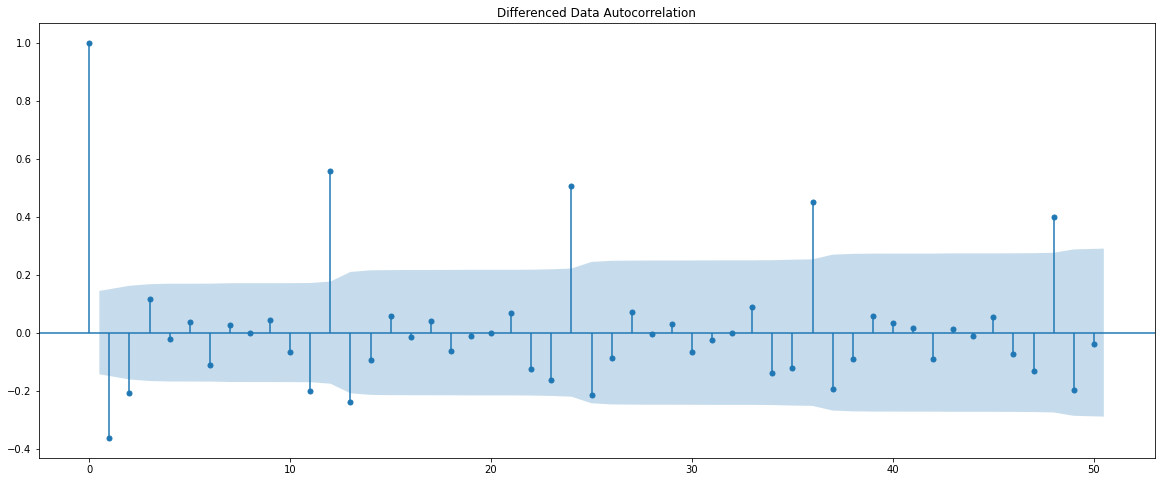

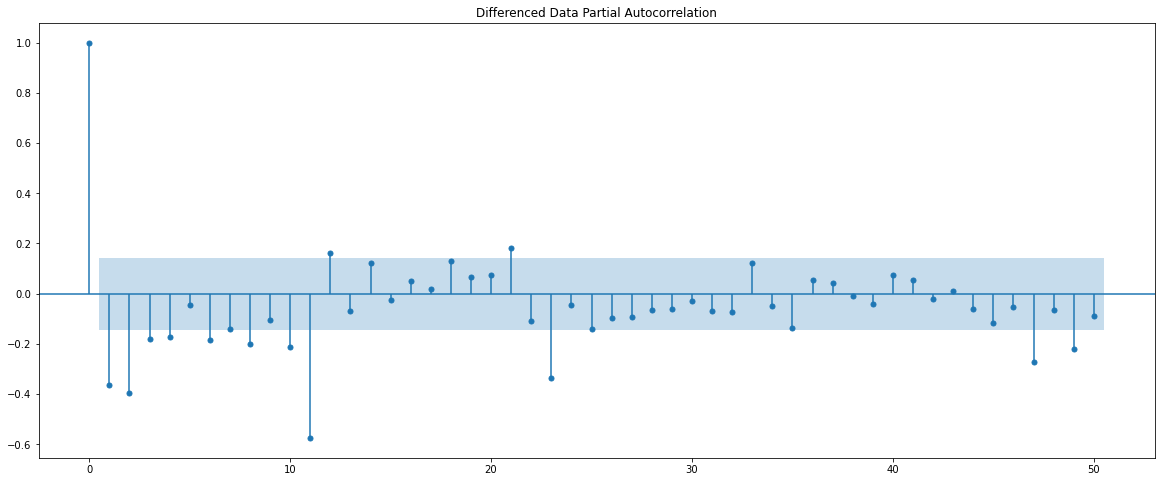

In [390]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [391]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(1,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -656.675
Date:                Tue, 15 Feb 2022   AIC                           1317.350
Time:                        23:48:33   BIC                           1323.101
Sample:                    01-31-1980   HQIC                          1319.687
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3555      0.067     -5.274      0.000      -0.488      -0.223
sigma2      1321.6677    125.729     10.512      0.000    1075.243    1568.092
Ljung-Box (L1) (Q):                   2.56   Jarque-

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [398]:
test["arima_predict"] = results_manual_ARIMA.forecast(steps=len(test))

<ipython-input-398-7e2fd086ccf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["arima_predict"] = results_manual_ARIMA.forecast(steps=len(test))


In [399]:
rmse = mean_squared_error(test['Rose'],test["arima_predict"],squared=False)
print(rmse)

74.02592957720944


In [402]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,1,0)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"ARIMA(2,1,3)",36.797052
"SARIMA(4,1,4)(1,1,1,6)",17.145498
"SARIMA(0,1,2)(2,0,2,12)",26.907439
"ARIMA(1,1,0)",74.025930


In [403]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 0),
                                seasonal_order=(0, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 6)   Log Likelihood                -672.458
Date:                           Tue, 15 Feb 2022   AIC                           1348.917
Time:                                   23:54:52   BIC                           1354.557
Sample:                                        0   HQIC                          1351.208
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3453      0.083     -4.175      0.000      -0.507      -0.183
sigma2      3005.5811    308.165      9.753

In [404]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,0)(0,1,0,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

334.4974445505873


,Test RMSE
"ARIMA(2,1,3)",36.797052
"SARIMA(4,1,4)(1,1,1,6)",17.145498
"SARIMA(0,1,2)(2,0,2,12)",26.907439
"ARIMA(1,1,0)",74.025930
"SARIMA(1,1,0)(0,1,0,6)",334.497445


### Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [405]:
resultsDf1 = pd.concat([resultsDf1,resultsDf])

resultsDf1

,Test RMSE
"ARIMA(2,1,3)",36.797052
"SARIMA(4,1,4)(1,1,1,6)",17.145498
"SARIMA(0,1,2)(2,0,2,12)",26.907439
"ARIMA(1,1,0)",74.025930
"SARIMA(1,1,0)(0,1,0,6)",334.497445
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930


In [406]:
resultsDf1.sort_values(["Test RMSE"],ascending=True)

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.633969
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402
RegressionOnTime,15.262509
"SARIMA(4,1,4)(1,1,1,6)",17.145498
"Alpha=0.065,Beta=0.0519,Gamma=3.879136202038614e-06,TripleExponentialSmoothing",20.995338
"SARIMA(0,1,2)(2,0,2,12)",26.907439


###  Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [102]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.2,
                                                                 smoothing_seasonal=0.2)

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [104]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Rose'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 17.40194318433039


In [105]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=12)

In [106]:
prediction_2

1995-08-31    47.695360
1995-09-30    48.283878
1995-10-31    50.268267
1995-11-30    58.436918
1995-12-31    82.074285
1996-01-31    31.677107
1996-02-29    39.401760
1996-03-31    45.319904
1996-04-30    46.754031
1996-05-31    40.681565
1996-06-30    46.938531
1996-07-31    54.126635
Freq: M, dtype: float64

In [107]:
prediction_2.index.day

Int64Index([31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31], dtype='int64')

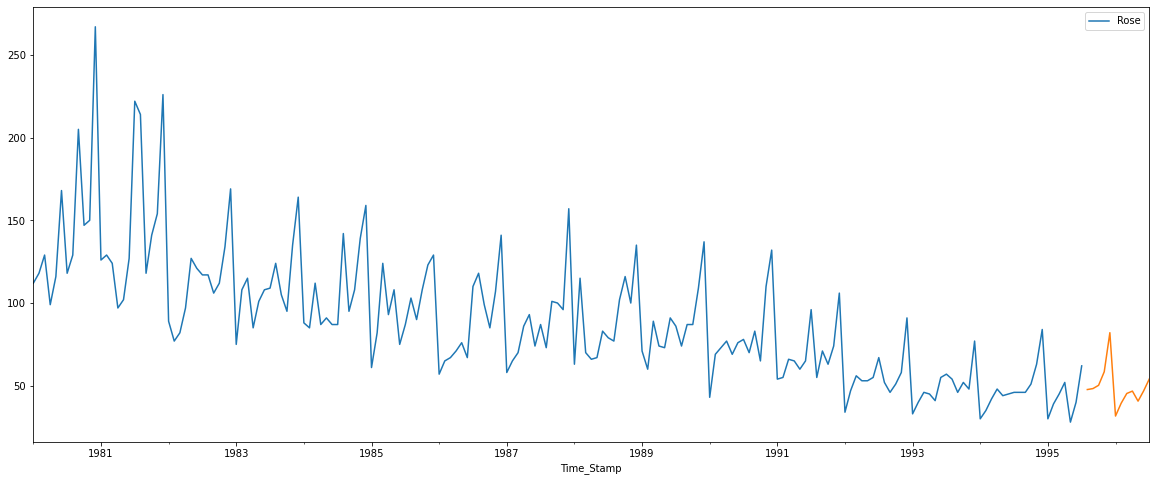

In [108]:
df.plot()
prediction_2.plot();

In [109]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,13.514598,47.695360,81.876121
1995-09-30,14.103116,48.283878,82.464639
1995-10-31,16.087505,50.268267,84.449028
1995-11-30,24.256156,58.436918,92.617679
1995-12-31,47.893523,82.074285,116.255046


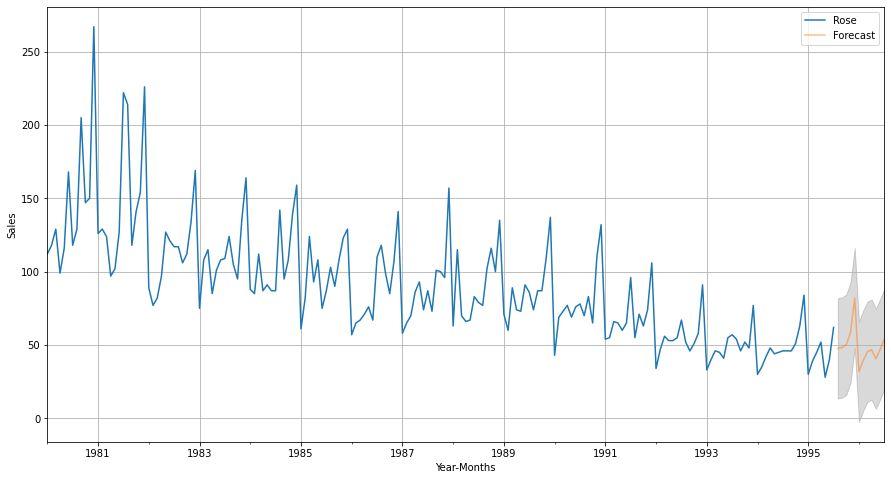

In [110]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

###   Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.